<a href="https://colab.research.google.com/github/tasmia008/Defect-Software/blob/main/Defect_DL_PC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datapath="/content/drive/MyDrive/Defect/defectPC1.csv"

In [ ]:
df=pd.read_csv(datapath)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loc               1109 non-null   float64
 1   v(g)              1109 non-null   float64
 2   ev(g)             1109 non-null   float64
 3   iv(g)             1109 non-null   float64
 4   n                 1109 non-null   float64
 5   v                 1109 non-null   float64
 6   l                 1109 non-null   float64
 7   d                 1109 non-null   float64
 8   i                 1109 non-null   float64
 9   e                 1109 non-null   float64
 10  b                 1109 non-null   float64
 11  t                 1109 non-null   float64
 12  lOCode            1109 non-null   int64  
 13  lOComment         1109 non-null   int64  
 14  lOBlank           1109 non-null   int64  
 15  lOCodeAndComment  1109 non-null   int64  
 16  uniq_Op           1109 non-null   float64


In [ ]:
map1 = {'False': 0, 'True': 1}
df['defects'] = df['defects'].replace(map1)

In [ ]:
df.head(10)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,91.0,9.0,3.0,2.0,318.0,2089.21,0.04,27.68,75.47,57833.24,...,80,44,11,31,29.0,66.0,192.0,126.0,17.0,True
3,109.0,21.0,5.0,18.0,381.0,2547.56,0.04,28.37,89.79,72282.68,...,97,41,12,24,28.0,75.0,229.0,152.0,38.0,True
4,505.0,106.0,41.0,82.0,2339.0,20696.93,0.01,75.93,272.58,1571506.88,...,457,71,48,49,64.0,397.0,1397.0,942.0,178.0,True
5,107.0,25.0,7.0,14.0,619.0,4282.78,0.02,52.91,80.95,226588.75,...,103,32,4,39,35.0,86.0,359.0,260.0,40.0,True
6,74.0,11.0,1.0,8.0,294.0,1917.93,0.03,28.77,66.66,55178.46,...,60,71,14,49,29.0,63.0,169.0,125.0,21.0,True
7,602.0,136.0,123.0,123.0,2785.0,25942.69,0.01,105.26,246.47,2730637.23,...,600,40,2,225,99.0,538.0,1641.0,1144.0,236.0,True
8,29.0,2.0,1.0,2.0,140.0,718.10,0.10,9.93,72.35,7127.80,...,28,3,1,8,8.0,27.0,73.0,67.0,3.0,True
9,36.0,3.0,1.0,1.0,254.0,1447.91,0.04,23.72,61.05,34338.99,...,34,2,2,10,15.0,37.0,137.0,117.0,5.0,True


In [ ]:
df = df.replace('?', 0)

In [ ]:
df.isna().values.any()

False

In [ ]:
df['defects'] = df['defects'].astype('int64')

In [ ]:
desc = pd.DataFrame(index = df.columns)
desc['count'] = df.count()
desc['nunique'] = df.nunique()
desc['%unique'] = desc['nunique'] / len(df) * 100
desc['null'] = df.isnull().sum()
desc['type'] = df.dtypes
desc = pd.concat([desc, df.describe().T], axis = 1)
desc

,count,nunique,%unique,null,type,count,mean,std,min,25%,50%,75%,max
loc,1109,111,10.009017,0,float64,1109.0,23.376105,35.284017,0.0,7.00,13.00,26.00,602.00
v(g),1109,48,4.328224,0,float64,1109.0,5.510730,8.958976,1.0,1.00,3.00,6.00,136.00
ev(g),1109,27,2.434626,0,float64,1109.0,2.766817,5.567704,1.0,1.00,1.00,3.00,123.00
iv(g),1109,31,2.795311,0,float64,1109.0,3.321371,6.401998,1.0,1.00,2.00,3.00,123.00
n,1109,312,28.133454,0,float64,1109.0,117.393417,197.336888,1.0,25.00,58.00,126.00,2785.00
v,1109,756,68.169522,0,float64,1109.0,699.711217,1509.545684,0.0,97.67,275.10,674.04,25942.69
l,1109,45,4.057710,0,float64,1109.0,0.129414,0.146952,0.0,0.05,0.08,0.16,2.00
d,1109,613,55.275023,0,float64,1109.0,15.396267,16.337508,0.0,5.71,11.61,20.50,270.66
i,1109,823,74.211001,0,float64,1109.0,32.904472,35.387685,0.0,14.04,23.57,41.15,598.33
e,1109,890,80.252480,0,float64,1109.0,28822.882381,170643.603328,0.0,558.13,3189.17,12381.56,4279633.01


<ipython-input-15-4b3f94243e14>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='defects',data=df,palette=["#FF0000","#0000FF"])


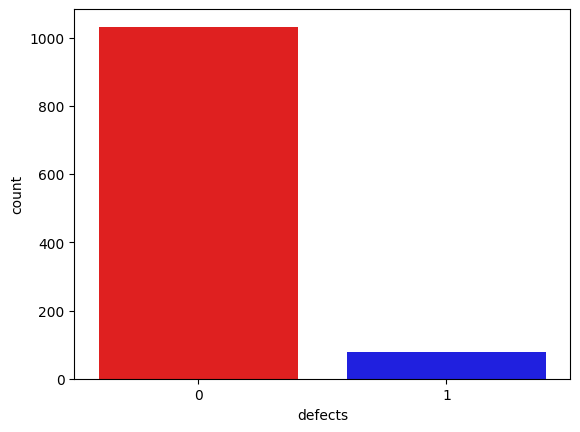

In [ ]:
sns.countplot(x='defects',data=df,palette=["#FF0000","#0000FF"])
plt.show()

In [ ]:
from imblearn.over_sampling import ADASYN
import pandas as pd

X = df.drop('defects', axis=1)
y = df['defects']

adasyn = ADASYN(sampling_strategy='all', random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='defects')], axis=1)
df = df_resampled.copy()

<ipython-input-18-4b3f94243e14>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='defects',data=df,palette=["#FF0000","#0000FF"])


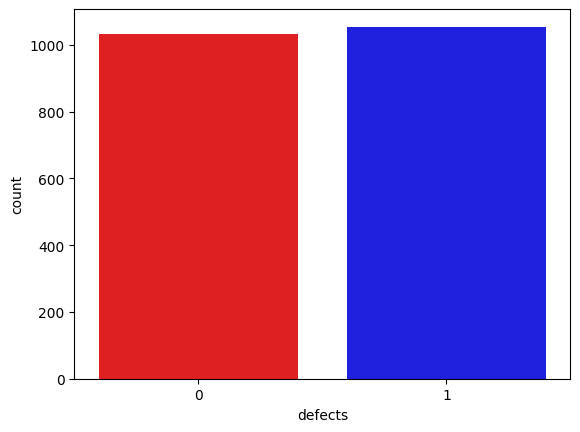

In [ ]:
sns.countplot(x='defects',data=df,palette=["#FF0000","#0000FF"])
plt.show()

In [ ]:
df['defects'].value_counts()

,count
defects,
1,1054
0,1032


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
X = df.drop('defects', axis=1)
y = df['defects']
k_best = 20
selector = SelectKBest(score_func=f_classif, k=k_best)
X_new = selector.fit_transform(X, y)
selected_feature_names = X.columns[selector.get_support()]
df_selected = pd.concat([df[selected_feature_names], df['defects']], axis=1)
#df_selected =df

In [ ]:
df.columns

Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'lOCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects'],
      dtype='object')

In [ ]:
prediction_var = ['loc', 'v(g)', 'iv(g)', 'n', 'v',  'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'lOCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']
df_selected=df

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_selected, test_size = 0.2)# in this our main data is splitted into train and test

In [ ]:
train_X = train[prediction_var]# taking the training data input
train_y=train['defects']# This is output of our training data
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test['defects']   #output value of test dat

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import RidgeClassifier, LassoCV, ElasticNetCV, PassiveAggressiveClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, log_loss, cohen_kappa_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, Bidirectional, Conv1D, MaxPooling1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#!pip install xgboost

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.fit_transform(test_X)

In [ ]:
# Reshape the input data for CNN (assuming you have sequences of features)
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], 1))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], 1))

In [ ]:
from sklearn.metrics import r2_score, confusion_matrix, precision_score, recall_score, f1_score, log_loss, cohen_kappa_score
# Lists to store training and validation accuracies
train_accuracies = []
val_accuracies = []
def evaluate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TP, FP, FN, TN = cm[1, 1], cm[0, 1], cm[1, 0], cm[0, 0]

    accuracy = ((TP + TN) / (TP + TN + FP + FN)) * 100
    precision = precision_score(y_true, y_pred)
    specificity = TN / (TN + FP)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    false_positive_rate = FP / (FP + TN)
    false_negative = FN / (FN + TP)
    negative_predictive_value = TN / (TN + FN)
    false_discovery_rate = FP / (TP + FP)

    print('Testing accuracy:', accuracy)
    print('Precision:', precision)
    print('Specificity:', specificity)
    print('F1 score:', f1)
    print('Sensitivity/Recall:', recall)
    print('False positive rate:', false_positive_rate)
    print('False negative:', false_negative)
    print('Negative Predictive Value:', negative_predictive_value)
    print('False Discovery Rate:', false_discovery_rate)

    # Additional Metrics
    print('Mean Absolute Error:', np.mean(np.abs(y_true - y_pred)))
    print('R Squared Error:', r2_score(test_y, y_pred))
    print('Root Mean Squared Error:', np.sqrt(np.mean((y_true - y_pred)**2)))
    print('Log Loss:', log_loss(y_true, y_pred))
    print('Cohen Kappa Score:', cohen_kappa_score(y_true, y_pred))
    plot_confusion_matrix(cm)

def plot_confusion_matrix(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes = ['Actual 0', 'Actual 1']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [ ]:
#ANN

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.6416 - loss: 0.6276 - val_accuracy: 0.8824 - val_loss: 0.4799
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7074 - loss: 0.5528 - val_accuracy: 0.8824 - val_loss: 0.4195
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7606 - loss: 0.5070 - val_accuracy: 0.8824 - val_loss: 0.4211
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8192 - loss: 0.4649 - val_accuracy: 0.8824 - val_loss: 0.4064
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8223 - loss: 0.4346 - val_accuracy: 0.8824 - val_loss: 0.3913
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8159 - loss: 0.4144 - val_accuracy: 0.8235 - val_loss: 0.4179
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8351 - loss: 0.4063 - val_accuracy: 0.8235 - val_loss: 0.4032
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8204 - loss: 0.4212 - val_accuracy: 0.8824 - val_loss: 0.

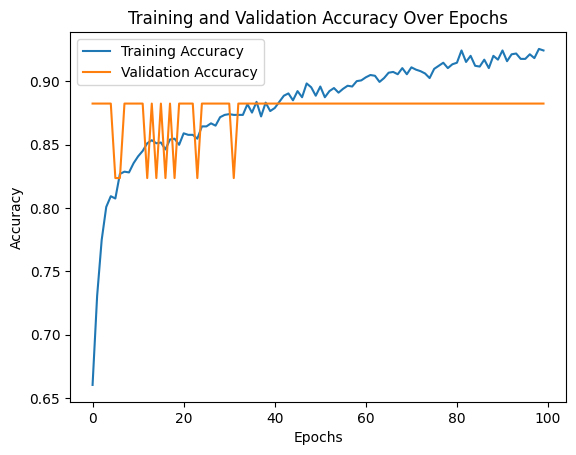

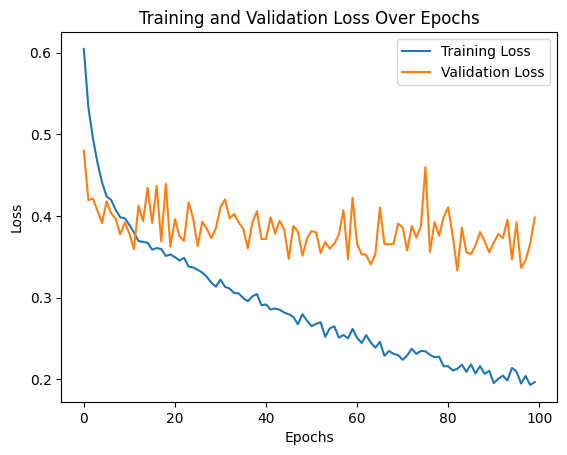

Testing accuracy: 87.32057416267942
Precision: 0.8947368421052632
Specificity: 0.9069767441860465
F1 score: 0.8651399491094148
Sensitivity/Recall: 0.8374384236453202
False positive rate: 0.09302325581395349
False negative: 0.1625615763546798
Negative Predictive Value: 0.8552631578947368
False Discovery Rate: 0.10526315789473684
Mean Absolute Error: 0.12679425837320574
R Squared Error: 0.49240462825065867
Root Mean Squared Error: 0.35608181415681106
Log Loss: 4.570128300533994
Cohen Kappa Score: 0.7457479284779764


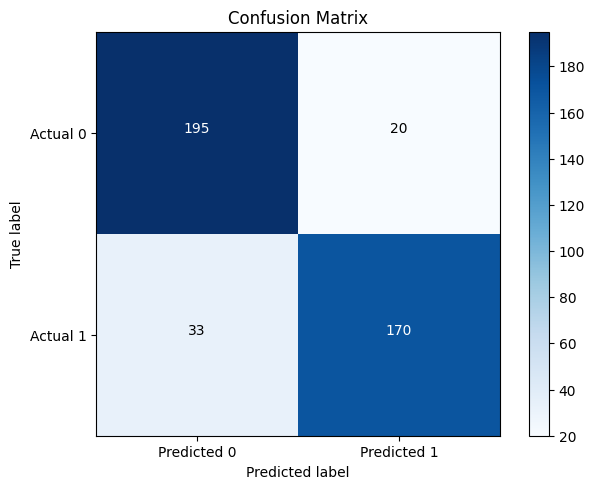

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, log_loss, cohen_kappa_score
import time
import itertools

# Define the best parameters obtained from hyperparameter tuning
best_ann_params = {'dropout_rate': 0.1, 'optimizer': 'rmsprop'}

# Build the ANN model with the best parameters
ann_model = Sequential([
    Dense(64, activation='relu', input_dim=train_X.shape[1]),
    Dropout(best_ann_params['dropout_rate']),
    Dense(32, activation='relu'),
    Dropout(best_ann_params['dropout_rate']),
    Dense(1, activation='sigmoid')
])

# Compile the ANN model with the best optimizer
ann_model.compile(optimizer=best_ann_params['optimizer'], loss='binary_crossentropy', metrics=['accuracy'])

# Measure training time
start_train_time = time.time()
history=ann_model.fit(train_X, train_y, epochs=100, batch_size=32, validation_split=0.01)
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print(f'Training time: {training_time:.4f} seconds')

# Measure testing time
start_test_time = time.time()
ann_predictions = (ann_model.predict(test_X) > 0.5).astype(int).ravel()
end_test_time = time.time()

# Calculate testing time
testing_time = end_test_time - start_test_time
print(f'Testing time: {testing_time:.4f} seconds')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Evaluate metrics
evaluate_metrics(test_y, ann_predictions)

In [ ]:
#RNN

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6319 - loss: 0.6303 - val_accuracy: 0.7275 - val_loss: 0.5701
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6860 - loss: 0.5792 - val_accuracy: 0.7275 - val_loss: 0.5498
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7314 - loss: 0.5571 - val_accuracy: 0.7665 - val_loss: 0.5273
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7548 - loss: 0.5305 - val_accuracy: 0.7545 - val_loss: 0.5151
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7881 - loss: 0.5020 - val_accuracy: 0.8533 - val_loss: 0.4233
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7977 - loss: 0.4671 - val_accuracy: 0.7725 - val_loss: 0.4426
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8261 - loss: 0.4465 - val_accuracy: 0.8503 - val_loss: 0.3747
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8297 - loss: 0.4048 - val_accuracy: 0.8563 - val_loss: 0

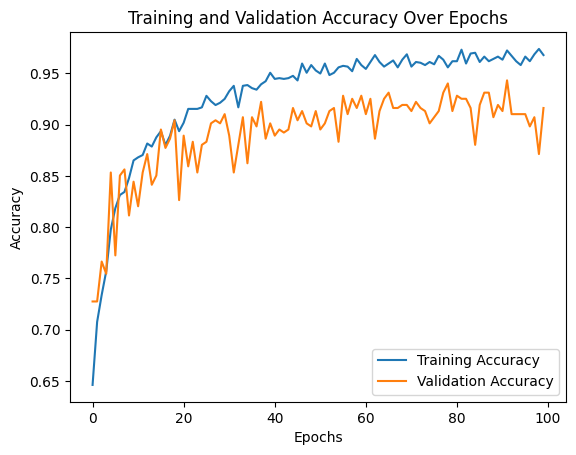

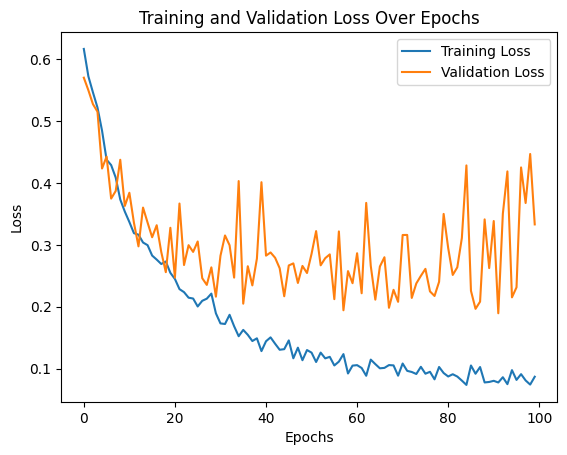

Testing accuracy: 83.49282296650718
Precision: 0.8160377358490566
Specificity: 0.8186046511627907
F1 score: 0.8337349397590362
Sensitivity/Recall: 0.8522167487684729
False positive rate: 0.1813953488372093
False negative: 0.1477832512315271
Negative Predictive Value: 0.8543689320388349
False Discovery Rate: 0.18396226415094338
Mean Absolute Error: 0.16507177033492823
R Squared Error: 0.3391682896093481
Root Mean Squared Error: 0.4062902538025349
Log Loss: 5.949789674280105
Cohen Kappa Score: 0.669992448339779


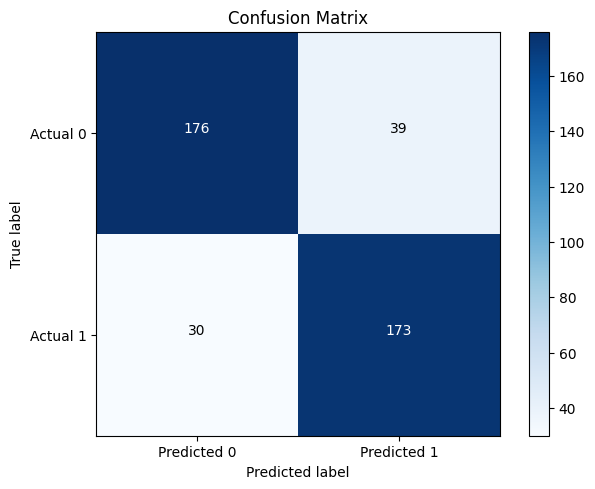

In [ ]:
from keras.optimizers import RMSprop

# Updated RNN model
rnn_model = Sequential([
    SimpleRNN(128, activation='relu', input_shape=(train_X.shape[1], 1)),
    Dropout(0.4),  # Update dropout rate
    Dense(1, activation='sigmoid')
])

# Compile the model with RMSprop optimizer
rnn_model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

# Measure training time
start_train_time = time.time()
# Fit the model with the training data
history=rnn_model.fit(train_X, train_y, epochs=100, batch_size=32, validation_split=0.2)
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print(f'Training time: {training_time:.4f} seconds')

# Measure testing time
start_test_time = time.time()
# Make predictions on the test data
rnn_predictions = (rnn_model.predict(test_X) > 0.5).astype(int).ravel()
end_test_time = time.time()

# Calculate testing time
testing_time = end_test_time - start_test_time
print(f'Testing time: {testing_time:.4f} seconds')
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Evaluate the updated RNN model using the defined metrics function
evaluate_metrics(test_y, rnn_predictions)

In [ ]:
#CNN

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6293 - loss: 0.6141 - val_accuracy: 0.7096 - val_loss: 0.5491
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7179 - loss: 0.5448 - val_accuracy: 0.7994 - val_loss: 0.4987
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7976 - loss: 0.4818 - val_accuracy: 0.8024 - val_loss: 0.4590
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8258 - loss: 0.4475 - val_accuracy: 0.8144 - val_loss: 0.4264
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8439 - loss: 0.4199 - val_accuracy: 0.8383 - val_loss: 0.4088
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8405 - loss: 0.3963 - val_accuracy: 0.8263 - val_loss: 0.3954
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8519 - loss: 0.3786 - val_accuracy: 0.8114 - val_loss: 0.3966
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8506 - loss: 0.3591 - val_accuracy: 0.8293 -

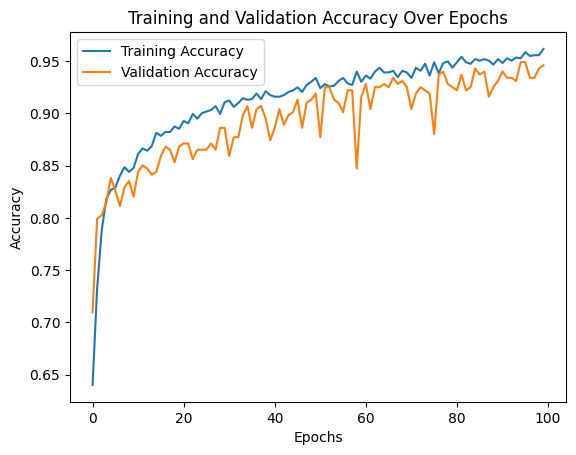

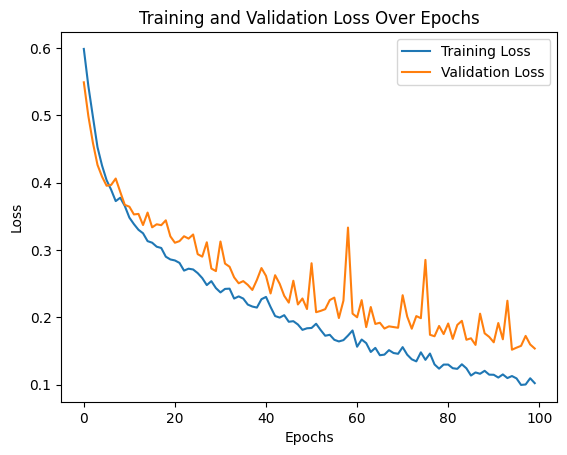

Testing accuracy: 82.05741626794259
Precision: 0.8950617283950617
Specificity: 0.9209302325581395
F1 score: 0.7945205479452054
Sensitivity/Recall: 0.7142857142857143
False positive rate: 0.07906976744186046
False negative: 0.2857142857142857
Negative Predictive Value: 0.7734375
False Discovery Rate: 0.10493827160493827
Mean Absolute Error: 0.17942583732057416
R Squared Error: 0.2817046626188566
Root Mean Squared Error: 0.42358687104367876
Log Loss: 6.467162689434896
Cohen Kappa Score: 0.6388165625936082


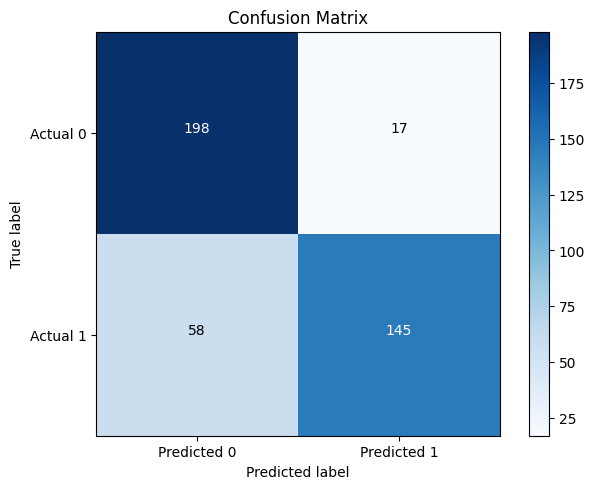

In [ ]:
# Updated CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=10, activation='relu', input_shape=(train_X.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.1),  # Update dropout rate
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Measure training time
start_train_time = time.time()
history=cnn_model.fit(train_X, train_y, epochs=100, batch_size=32, validation_split=0.2)
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print(f'Training time: {training_time:.4f} seconds')

# Measure testing time
start_test_time = time.time()
# Make predictions on the test data
cnn_predictions = (cnn_model.predict(test_X) > 0.5).astype(int).ravel()
end_test_time = time.time()

# Calculate testing time
testing_time = end_test_time - start_test_time
print(f'Testing time: {testing_time:.4f} seconds')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()


# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Evaluate the updated CNN model using the defined metrics function
evaluate_metrics(test_y, cnn_predictions)

In [ ]:
#LSTM

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.6275 - loss: 0.6700 - val_accuracy: 0.7006 - val_loss: 0.6201
Epoch 2/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6556 - loss: 0.6159 - val_accuracy: 0.7096 - val_loss: 0.5667
Epoch 3/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6916 - loss: 0.5913 - val_accuracy: 0.7246 - val_loss: 0.5698
Epoch 4/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7131 - loss: 0.5586 - val_accuracy: 0.7096 - val_loss: 0.5768
Epoch 5/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7089 - loss: 0.5807 - val_accuracy: 0.7066 - val_loss: 0.5595
Epoch 6/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7240 - loss: 0.5456 - val_accuracy: 0.7246 - val_loss: 0.5558
Epoch 7/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7307 - loss: 0.5580 - val_accuracy: 0.7156 - val_loss: 0.5554
Epoch 8/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7301 - loss: 0.5672 - val_accuracy: 0.7275 - v

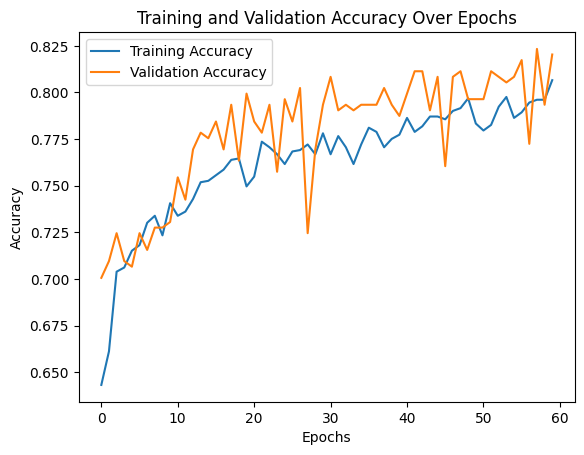

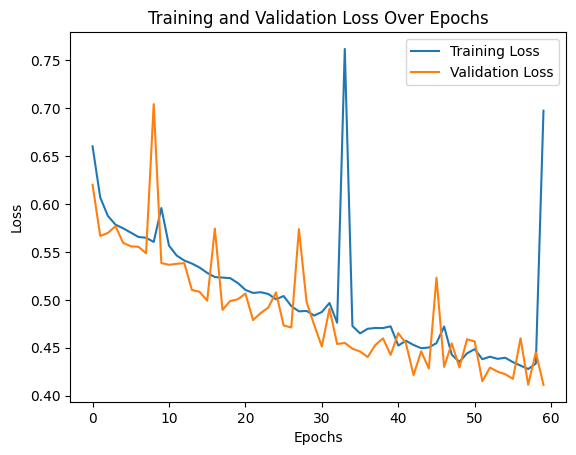

Testing accuracy: 74.88038277511961
Precision: 0.8141025641025641
Specificity: 0.8651162790697674
F1 score: 0.7075208913649025
Sensitivity/Recall: 0.625615763546798
False positive rate: 0.13488372093023257
False negative: 0.37438423645320196
Negative Predictive Value: 0.7099236641221374
False Discovery Rate: 0.1858974358974359
Mean Absolute Error: 0.2511961722488038
R Squared Error: -0.005613472333600766
Root Mean Squared Error: 0.5011947448335864
Log Loss: 9.054027765208854
Cohen Kappa Score: 0.4939233909093006


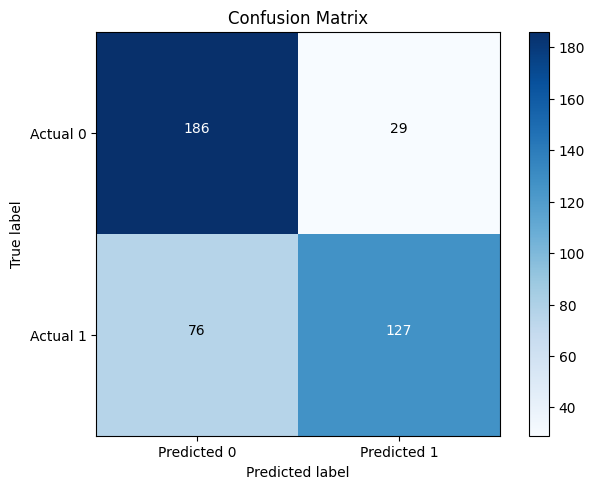

In [ ]:
# Updated LSTM model
lstm_model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(train_X.shape[1], 1)),
    Dropout(0.1),  # Update dropout rate
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
lstm_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Measure training time
start_train_time = time.time()
# Fit the model with the training data
history=lstm_model.fit(train_X, train_y, epochs=60, batch_size=32, validation_split=0.2)
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print(f'Training time: {training_time:.4f} seconds')

# Measure testing time
start_test_time = time.time()
# Make predictions on the test data
lstm_predictions = (lstm_model.predict(test_X) > 0.5).astype(int).ravel()
end_test_time = time.time()

# Calculate testing time
testing_time = end_test_time - start_test_time
print(f'Testing time: {testing_time:.4f} seconds')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()


# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Evaluate the updated LSTM model using the defined metrics function
evaluate_metrics(test_y, lstm_predictions)

In [ ]:
#BLSTM

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.5700 - loss: 0.7100 - val_accuracy: 0.7006 - val_loss: 0.6030
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6637 - loss: 0.6081 - val_accuracy: 0.6886 - val_loss: 0.5779
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6966 - loss: 0.5954 - val_accuracy: 0.7186 - val_loss: 0.5776
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7325 - loss: 0.5869 - val_accuracy: 0.7246 - val_loss: 0.5545
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7253 - loss: 0.5794 - val_accuracy: 0.7335 - val_loss: 0.5657
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7340 - loss: 0.5790 - val_accuracy: 0.7275 - val_loss: 0.5629
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7271 - loss: 0.5736 - val_accuracy: 0.7156 - val_loss: 0.5579
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7314 - loss: 0.5592 - val_accuracy: 0.7335 - v

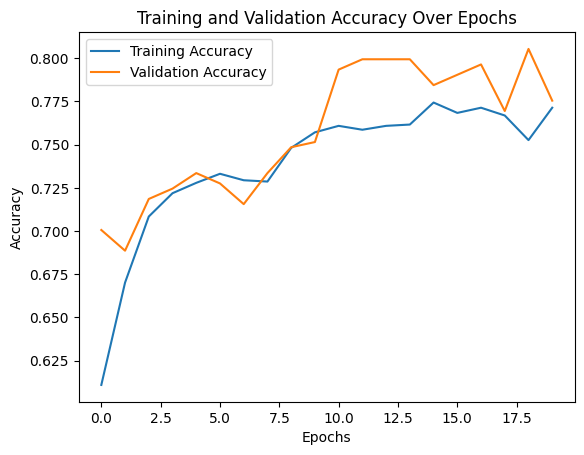

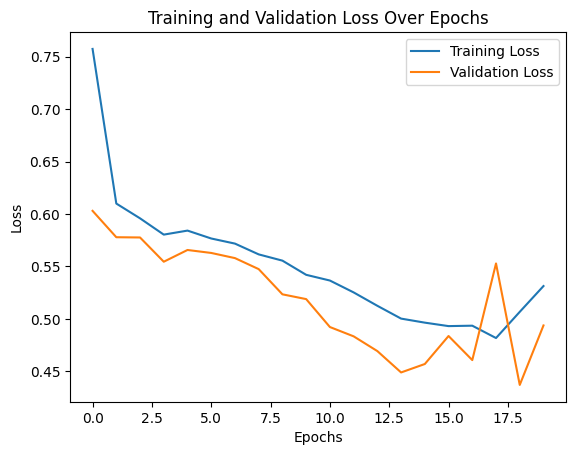

Testing accuracy: 78.4688995215311
Precision: 0.7652582159624414
Specificity: 0.7674418604651163
F1 score: 0.7836538461538463
Sensitivity/Recall: 0.8029556650246306
False positive rate: 0.23255813953488372
False negative: 0.19704433497536947
Negative Predictive Value: 0.8048780487804879
False Discovery Rate: 0.2347417840375587
Mean Absolute Error: 0.215311004784689
R Squared Error: 0.13804559514262804
Root Mean Squared Error: 0.4640161686673095
Log Loss: 7.760595227321876
Cohen Kappa Score: 0.5696144605880333


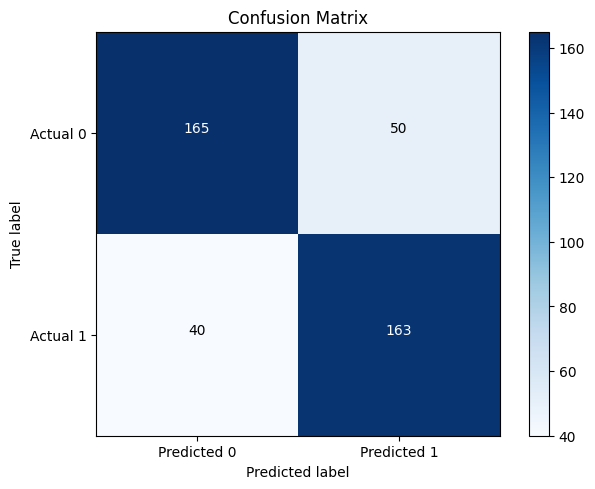

In [ ]:
# Updated Bidirectional LSTM (BLSTM) model
blstm_model = Sequential([
    Bidirectional(LSTM(units=100, activation='relu'), input_shape=(train_X.shape[1], 1)),
    Dropout(0.2),  # Update dropout rate
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
blstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Measure training time
start_train_time = time.time()
# Fit the model with the training data
history=blstm_model.fit(train_X, train_y, epochs=20, batch_size=32, validation_split=0.2)
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print(f'Training time: {training_time:.4f} seconds')

# Measure testing time
start_test_time = time.time()
blstm_predictions = (blstm_model.predict(test_X) > 0.5).astype(int).ravel()
end_test_time = time.time()

# Calculate testing time
testing_time = end_test_time - start_test_time
print(f'Testing time: {testing_time:.4f} seconds')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Evaluate the updated BLSTM model using the defined metrics function
evaluate_metrics(test_y, blstm_predictions)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9318 - loss: 0.1765
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9489 - loss: 0.1241
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9545 - loss: 0.1311
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8132 - loss: 0.4017
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8165 - loss: 0.3867
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


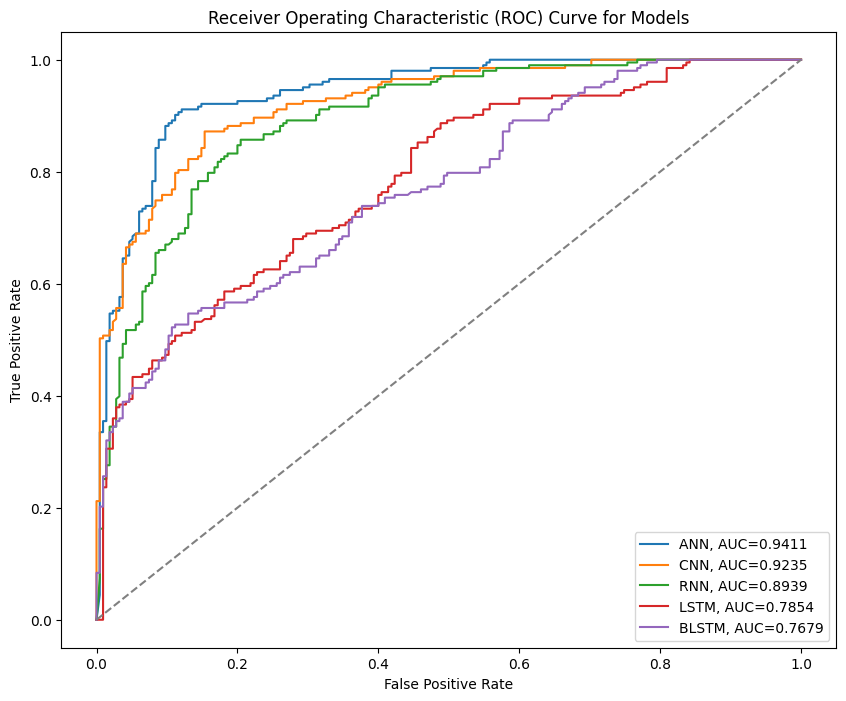

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, SimpleRNN, LSTM, Bidirectional
import numpy as np

# Assuming you have trained models named ann_model, cnn_model, rnn_model, lstm_model, blstm_model

models = [ann_model, cnn_model, rnn_model, lstm_model, blstm_model]
model_names = ['ANN', 'CNN', 'RNN', 'LSTM', 'BLSTM']

plt.figure(figsize=(10, 8))

for model, model_name in zip(models, model_names):
    if not hasattr(model, "fit"):
        print(f"Model {model_name} does not have 'fit' method.")
        continue

    model.fit(train_X, train_y)  # Make sure to fit the model before using it

    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(test_X)[:, 1]
    else:
        y_score = model.predict(test_X)

    fpr, tpr, _ = roc_curve(test_y, y_score)
    auc_value = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name}, AUC={round(auc_value, 4)}")

# Add diagonal line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve for Models")
plt.legend()
plt.show()


In [ ]:
#Hyper Paramenter tunning

In [ ]:
#ANN

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create ANN model
def create_ann_model(optimizer='adam', dropout_rate=0.5):
    ann_model = Sequential()
    ann_model.add(Dense(units=64, activation='relu', input_dim=train_X.shape[1]))
    ann_model.add(Dropout(dropout_rate))
    ann_model.add(Dense(units=32, activation='relu'))
    ann_model.add(Dropout(dropout_rate))
    ann_model.add(Dense(units=1, activation='sigmoid'))
    ann_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return ann_model

# Define hyperparameters to tune
ann_params = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'dropout_rate': [0.001,0.1, 0.2, 0.4, 0.6,1]
}

# Create KerasClassifier wrapper for scikit-learn
ann_classifier = KerasClassifier(build_fn=create_ann_model, epochs=10, batch_size=32, verbose=0)

# GridSearchCV for ANN
grid_ann = GridSearchCV(estimator=ann_classifier, param_grid=ann_params, scoring='accuracy', cv=3)
grid_ann_result = grid_ann.fit(train_X, train_y)

# Print best parameters and accuracy
print("Best ANN Parameters:", grid_ann_result.best_params_)
print("Best ANN Accuracy:", grid_ann_result.best_score_)

C:\Users\Mridul\AppData\Local\Temp\ipykernel_14820\3260728665.py:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_classifier = KerasClassifier(build_fn=create_ann_model, epochs=10, batch_size=32, verbose=0)


2/2 [==============================] - 0s 2ms/step


C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
9 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\ProgramData\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  F

Best ANN Parameters: {'dropout_rate': 0.1, 'optimizer': 'rmsprop'}
Best ANN Accuracy: 0.9499184719310506


In [ ]:
#CNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create CNN model
def create_cnn_model(optimizer='adam', filters=32, kernel_size=3, dropout_rate=0.5):
    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(train_X.shape[1], 1)))
    cnn_model.add(MaxPooling1D(pool_size=2))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(units=64, activation='relu'))
    cnn_model.add(Dropout(dropout_rate))
    cnn_model.add(Dense(units=1, activation='sigmoid'))
    cnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return cnn_model

# Define hyperparameters to tune
cnn_params = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'filters': [8,16,32, 64],
    'kernel_size': [1,3, 5,10],
    'dropout_rate': [0.1,0.2, 0.4, 0.6,1]
}

# Create KerasClassifier wrapper for scikit-learn
cnn_classifier = KerasClassifier(build_fn=create_cnn_model, epochs=10, batch_size=32, verbose=0)

# GridSearchCV for CNN
grid_cnn = GridSearchCV(estimator=cnn_classifier, param_grid=cnn_params, scoring='accuracy', cv=3)
grid_cnn_result = grid_cnn.fit(train_X, train_y)

# Print best parameters and accuracy
print("Best CNN Parameters:", grid_cnn_result.best_params_)
print("Best CNN Accuracy:", grid_cnn_result.best_score_)


C:\Users\Mridul\AppData\Local\Temp\ipykernel_14820\1856113146.py:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  cnn_classifier = KerasClassifier(build_fn=create_cnn_model, epochs=10, batch_size=32, verbose=0)


2/2 [==============================] - 1s 2ms/step


2/2 [==============================] - 0s 2ms/step


C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
144 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\ProgramData\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)


Best CNN Parameters: {'dropout_rate': 0.1, 'filters': 64, 'kernel_size': 3, 'optimizer': 'rmsprop'}
Best CNN Accuracy: 0.956324248777079


In [ ]:
#RNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create RNN model
def create_rnn_model(optimizer='adam', units=32, dropout_rate=0.5):
    rnn_model = Sequential()
    rnn_model.add(SimpleRNN(units=units, activation='relu', input_shape=(train_X.shape[1], 1)))
    rnn_model.add(Dropout(dropout_rate))
    rnn_model.add(Dense(units=1, activation='sigmoid'))
    rnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return rnn_model

# Define hyperparameters to tune
rnn_params = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'units': [8, 16,32, 64,128],
    'dropout_rate':  [0.001,0.1, 0.2, 0.4, 0.6,1]
}

# Create KerasClassifier wrapper for scikit-learn
rnn_classifier = KerasClassifier(build_fn=create_rnn_model, epochs=10, batch_size=32, verbose=0)

# GridSearchCV for RNN
grid_rnn = GridSearchCV(estimator=rnn_classifier, param_grid=rnn_params, scoring='accuracy', cv=3)
grid_rnn_result = grid_rnn.fit(train_X, train_y)

# Print best parameters and accuracy
print("Best RNN Parameters:", grid_rnn_result.best_params_)
print("Best RNN Accuracy:", grid_rnn_result.best_score_)


C:\Users\Mridul\AppData\Local\Temp\ipykernel_14820\3112895123.py:23: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  rnn_classifier = KerasClassifier(build_fn=create_rnn_model, epochs=10, batch_size=32, verbose=0)


2/2 [==============================] - 0s 2ms/step


C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\ProgramData\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
 

Best RNN Parameters: {'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'units': 128}
Best RNN Accuracy: 0.9126484975541579


In [ ]:
#LSTM

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create LSTM model
def create_lstm_model(optimizer='adam', units=50, dropout_rate=0.5):
    lstm_model = Sequential()
    lstm_model.add(LSTM(units=units, activation='relu', input_shape=(train_X.shape[1], 1)))
    lstm_model.add(Dropout(dropout_rate))
    lstm_model.add(Dense(units=1, activation='sigmoid'))
    lstm_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return lstm_model

# Define hyperparameters to tune
lstm_params = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'units': [10,50,75,90, 100],
    'dropout_rate': [0.001,0.1, 0.2, 0.4, 0.6,1]
}

# Create KerasClassifier wrapper for scikit-learn
lstm_classifier = KerasClassifier(build_fn=create_lstm_model, epochs=10, batch_size=32, verbose=0)

# GridSearchCV for LSTM
grid_lstm = GridSearchCV(estimator=lstm_classifier, param_grid=lstm_params, scoring='accuracy', cv=3)
grid_lstm_result = grid_lstm.fit(train_X, train_y)

# Print best parameters and accuracy
print("Best LSTM Parameters:", grid_lstm_result.best_params_)
print("Best LSTM Accuracy:", grid_lstm_result.best_score_)


C:\Users\Mridul\AppData\Local\Temp\ipykernel_14820\1838267672.py:23: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_classifier = KerasClassifier(build_fn=create_lstm_model, epochs=10, batch_size=32, verbose=0)


2/2 [==============================] - 0s 4ms/step


C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\ProgramData\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
 

Best LSTM Parameters: {'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'units': 50}
Best LSTM Accuracy: 0.9125320288842301


In [ ]:
#BLSTM

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create BLSTM model
def create_blstm_model(optimizer='adam', units=50, dropout_rate=0.5):
    blstm_model = Sequential()
    blstm_model.add(Bidirectional(LSTM(units=units, activation='relu'), input_shape=(train_X.shape[1], 1)))
    blstm_model.add(Dropout(dropout_rate))
    blstm_model.add(Dense(units=1, activation='sigmoid'))
    blstm_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return blstm_model

# Define hyperparameters to tune
blstm_params = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'units':   [10,50,75,90, 100],
    'dropout_rate':  [0.001,0.1, 0.2, 0.4, 0.6,1]
}

# Create KerasClassifier wrapper for scikit-learn
blstm_classifier = KerasClassifier(build_fn=create_blstm_model, epochs=10, batch_size=32, verbose=0)

# GridSearchCV for BLSTM
grid_blstm = GridSearchCV(estimator=blstm_classifier, param_grid=blstm_params, scoring='accuracy', cv=3)
grid_blstm_result = grid_blstm.fit(train_X, train_y)

# Print best parameters and accuracy
print("Best BLSTM Parameters:", grid_blstm_result.best_params_)
print("Best BLSTM Accuracy:", grid_blstm_result.best_score_)


C:\Users\Mridul\AppData\Local\Temp\ipykernel_14820\856918012.py:23: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  blstm_classifier = KerasClassifier(build_fn=create_blstm_model, epochs=10, batch_size=32, verbose=0)


2/2 [==============================] - 0s 8ms/step


C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\ProgramData\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
 

Best BLSTM Parameters: {'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'units': 100}
Best BLSTM Accuracy: 0.9062427207081295
